Workbook for the final


In [16]:
import matplotlib.pyplot as plt 
import xarray as xr
import numpy as np
import pandas as pd
import cmocean 
import momlevel as ml # for computing annual mean 

In [2]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

In [3]:
#lets import data
clt = xr.open_dataset('/home/ees_student/final_project_data/data/clt_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #total cloud cover
evspsbl =  xr.open_dataset('/home/ees_student/final_project_data/data/evspsbl_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #evaportation w sublimation &transpiration
huss = xr.open_dataset('/home/ees_student/final_project_data/data/huss_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #near surface spec humidity
pr = xr.open_dataset('/home/ees_student/final_project_data/data/pr_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #precip
prsn = xr.open_dataset('/home/ees_student/final_project_data/data/prsn_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #snowfall flux
rlut =  xr.open_dataset('/home/ees_student/final_project_data/data/rlut_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #TOA outgoing longwave rad
rsdt = xr.open_dataset('/home/ees_student/final_project_data/data/rsdt_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #TOA incident sw rad
rsut = xr.open_dataset('/home/ees_student/final_project_data/data/rsut_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #TOA outgoin sw rad
rtmt = xr.open_dataset('/home/ees_student/final_project_data/data/rtmt_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #downward rad flux at top of model
tas = xr.open_dataset('/home/ees_student/final_project_data/data/tas_Amon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #near surface air temp
siconc =  xr.open_dataset('/home/ees_student/final_project_data/data/siconc_SImon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #sea ice area %
sithick = xr.open_dataset('/home/ees_student/final_project_data/data/sithick_SImon_CanESM5_volc-long-eq_r1i1p2f1_gn_181504-187003.nc') #sea ice thickness

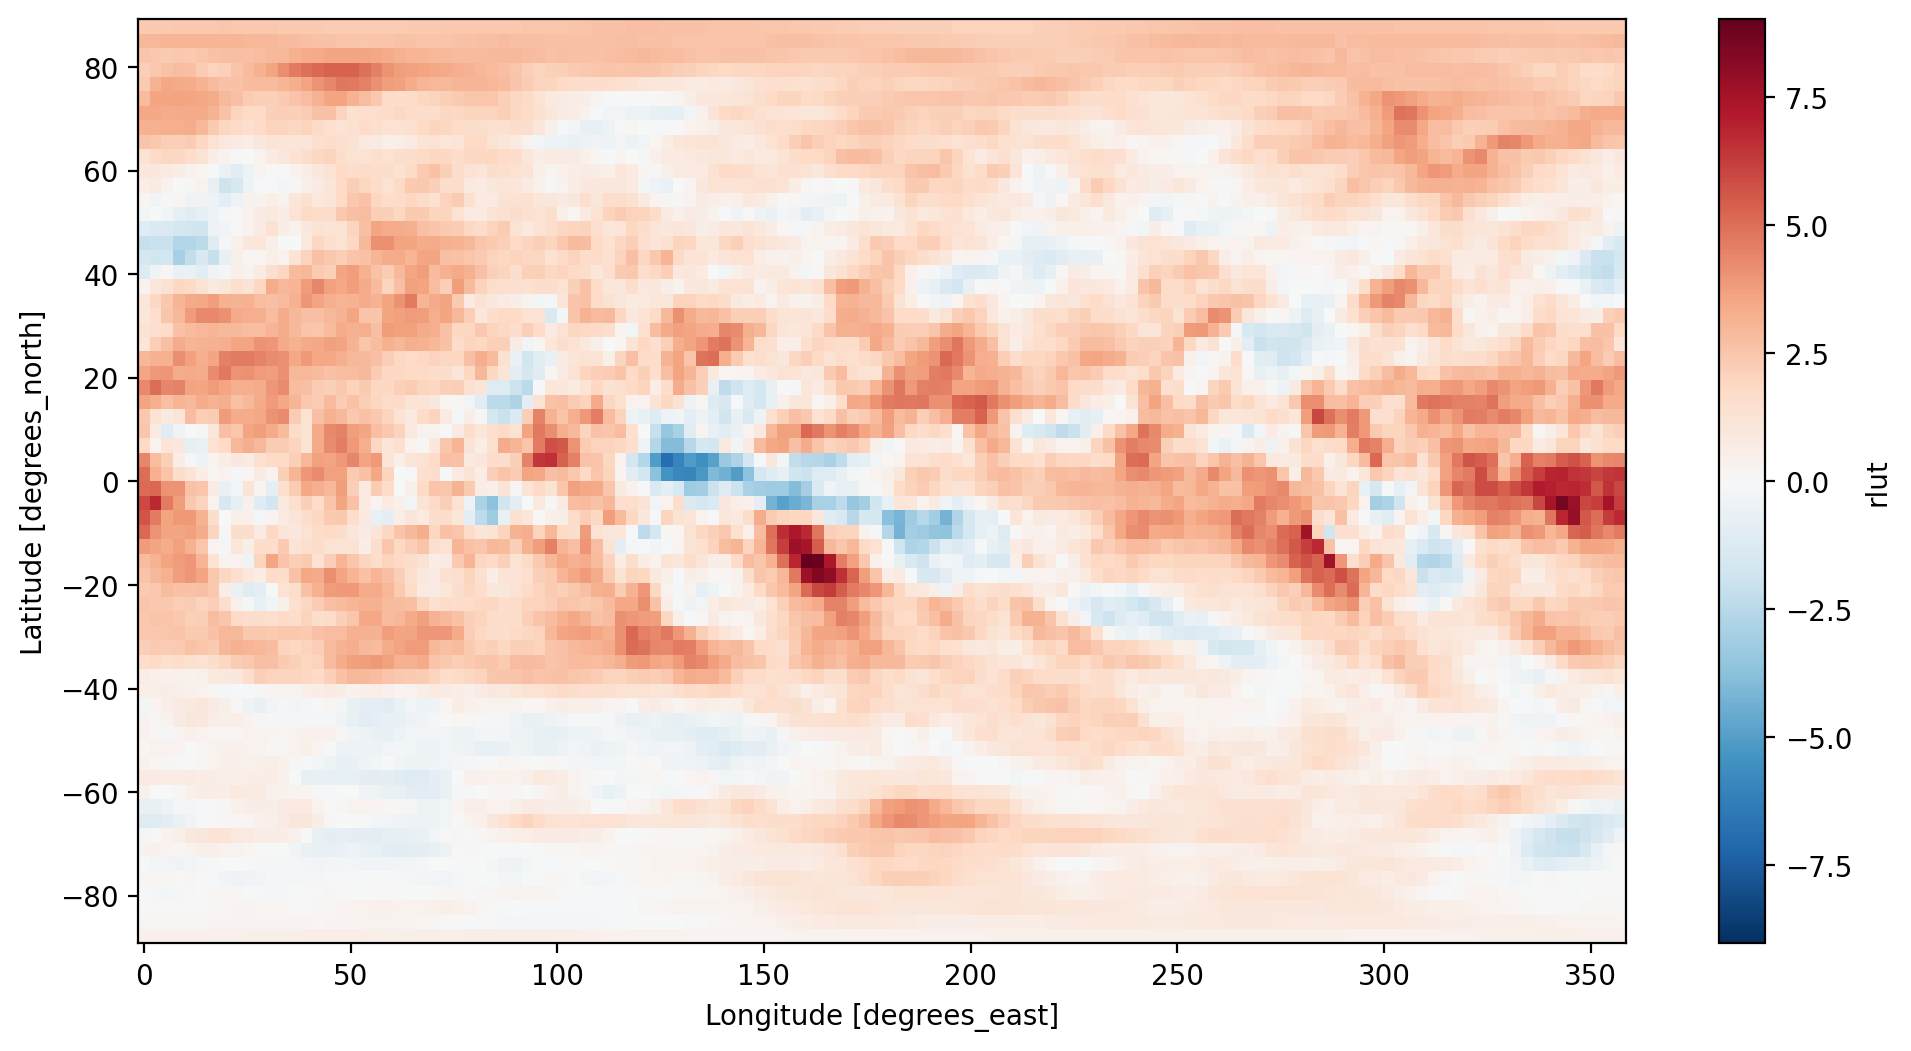

In [5]:
rlut_first = rlut.rlut.sel(time=slice('1815-04-16' , '1825-04-16')).mean(dim='time') #first 10 years
rlut_last = rlut.rlut.sel(time=slice('1860-04-16' , '1870-04-16')).mean(dim='time') #last 10
rlut_dif = rlut_last-rlut_first
rlut_dif.plot()

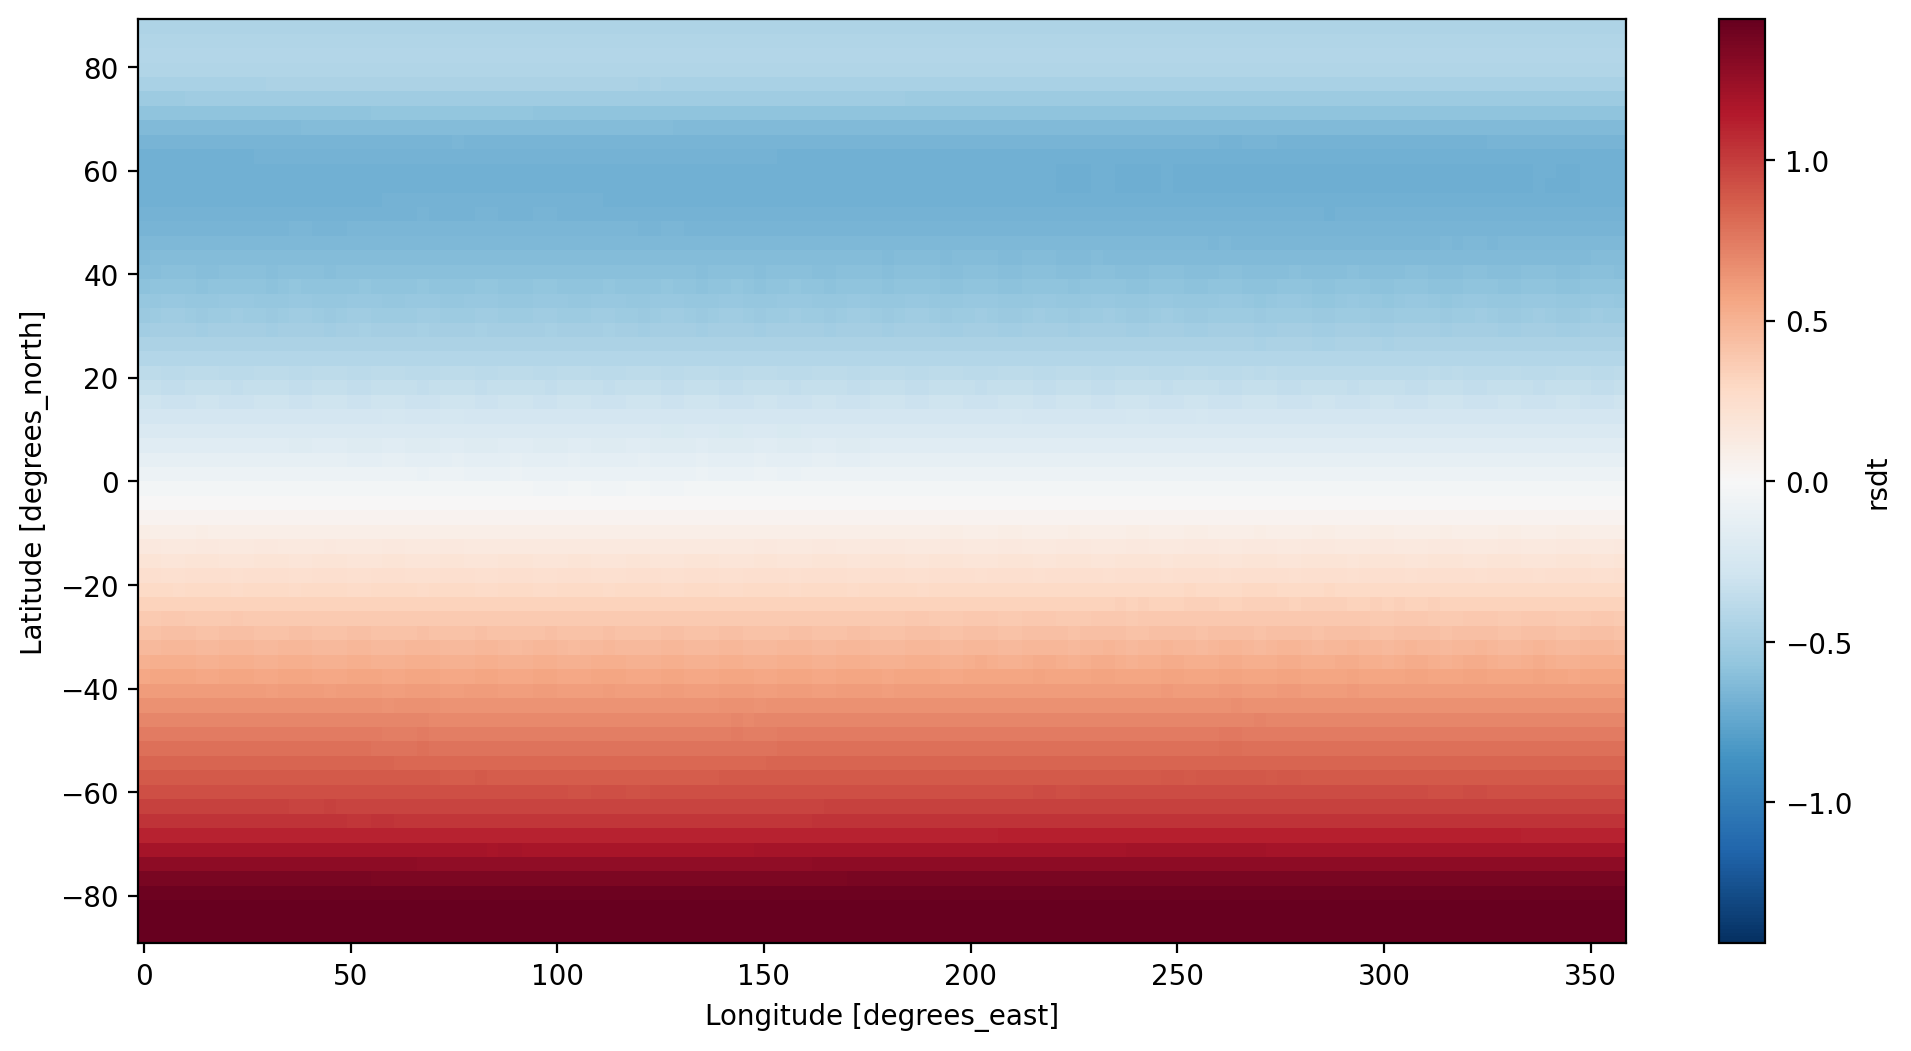

In [6]:
rsdt_first = rsdt.rsdt.sel(time=slice('1815-04-16' , '1825-04-16')).mean(dim='time') #first 10 years
rsdt_last = rsdt.rsdt.sel(time=slice('1860-04-16' , '1870-04-16')).mean(dim='time') #last 10
rsdt_dif = rsdt_last-rsdt_first
rsdt_dif.plot()

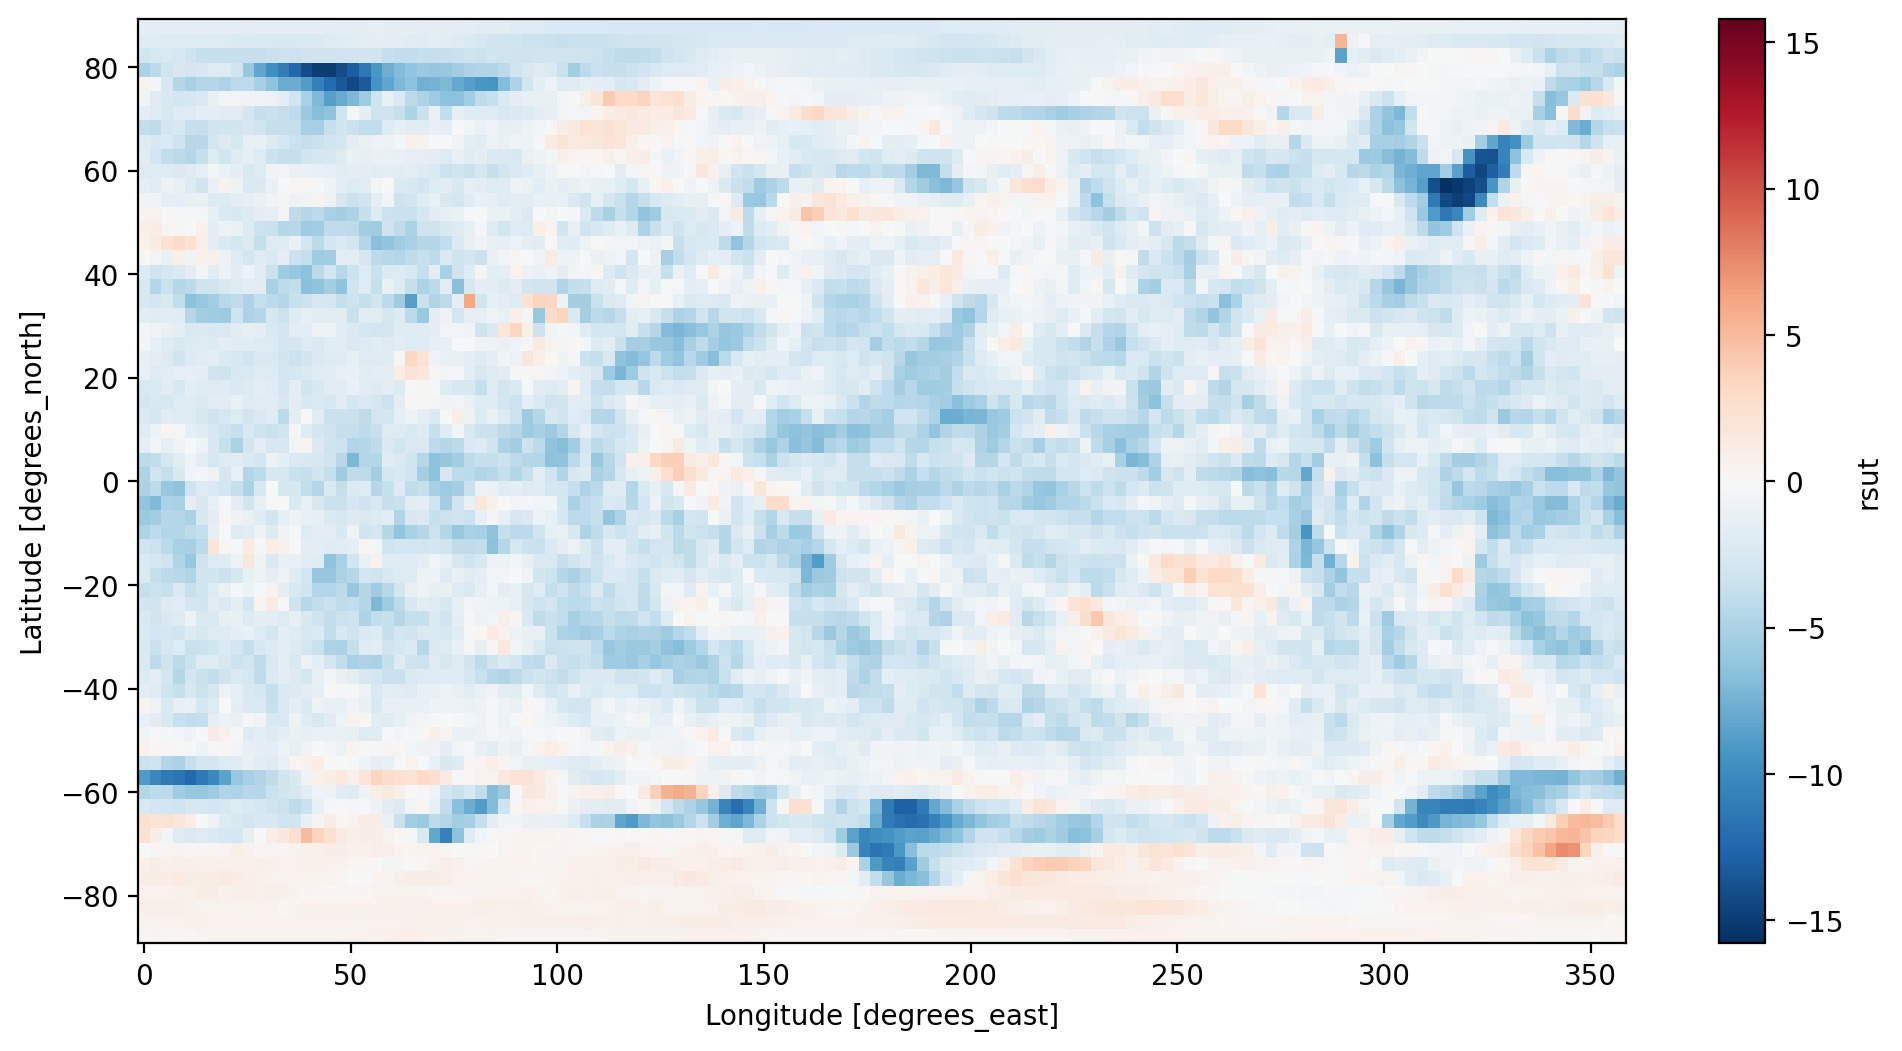

In [7]:
rsut_first = rsut.rsut.sel(time=slice('1815-04-16' , '1825-04-16')).mean(dim='time') #first 10 years
rsut_last = rsut.rsut.sel(time=slice('1860-04-16' , '1870-04-16')).mean(dim='time') #last 10
rsut_dif = rsut_last-rsut_first
rsut_dif.plot()

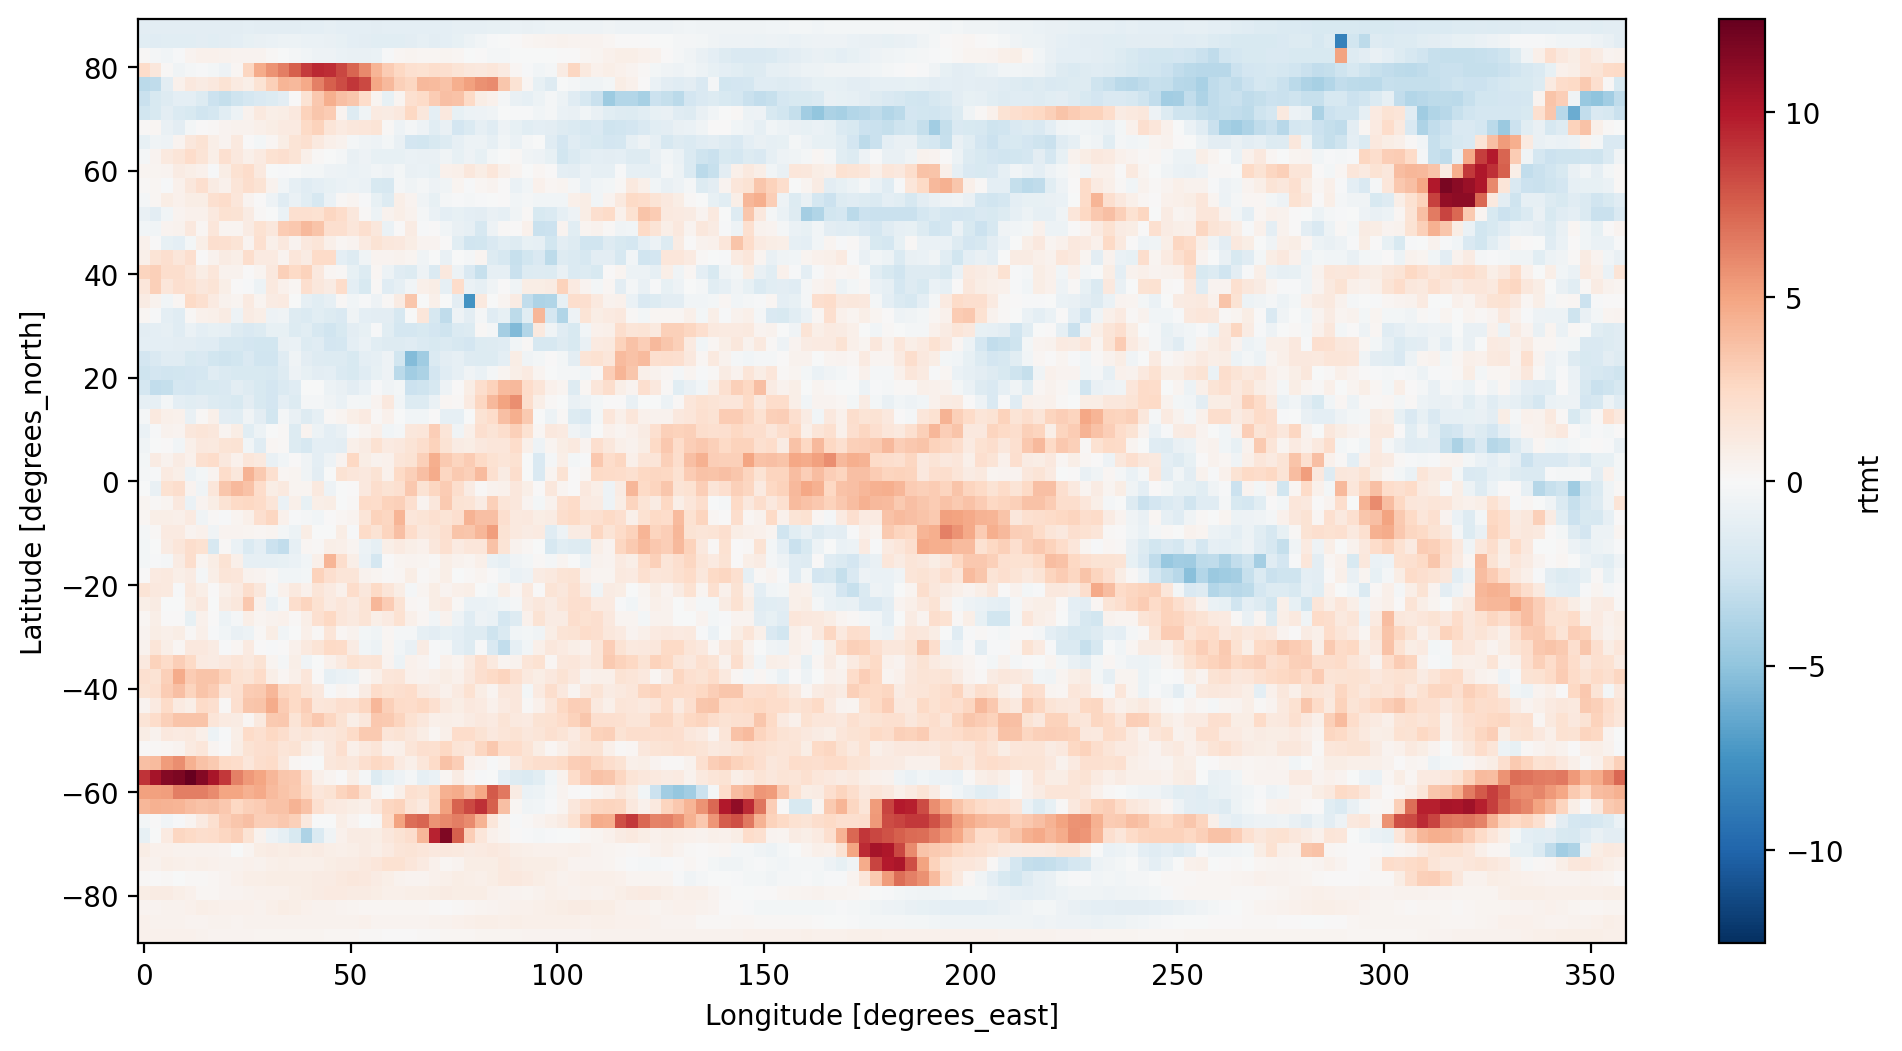

In [8]:
rtmt_first = rtmt.rtmt.sel(time=slice('1815-04-16' , '1825-04-16')).mean(dim='time') #first 10 years
rtmt_last = rtmt.rtmt.sel(time=slice('1860-04-16' , '1870-04-16')).mean(dim='time') #last 10
rtmt_dif = rtmt_last-rtmt_first
rtmt_dif.plot()

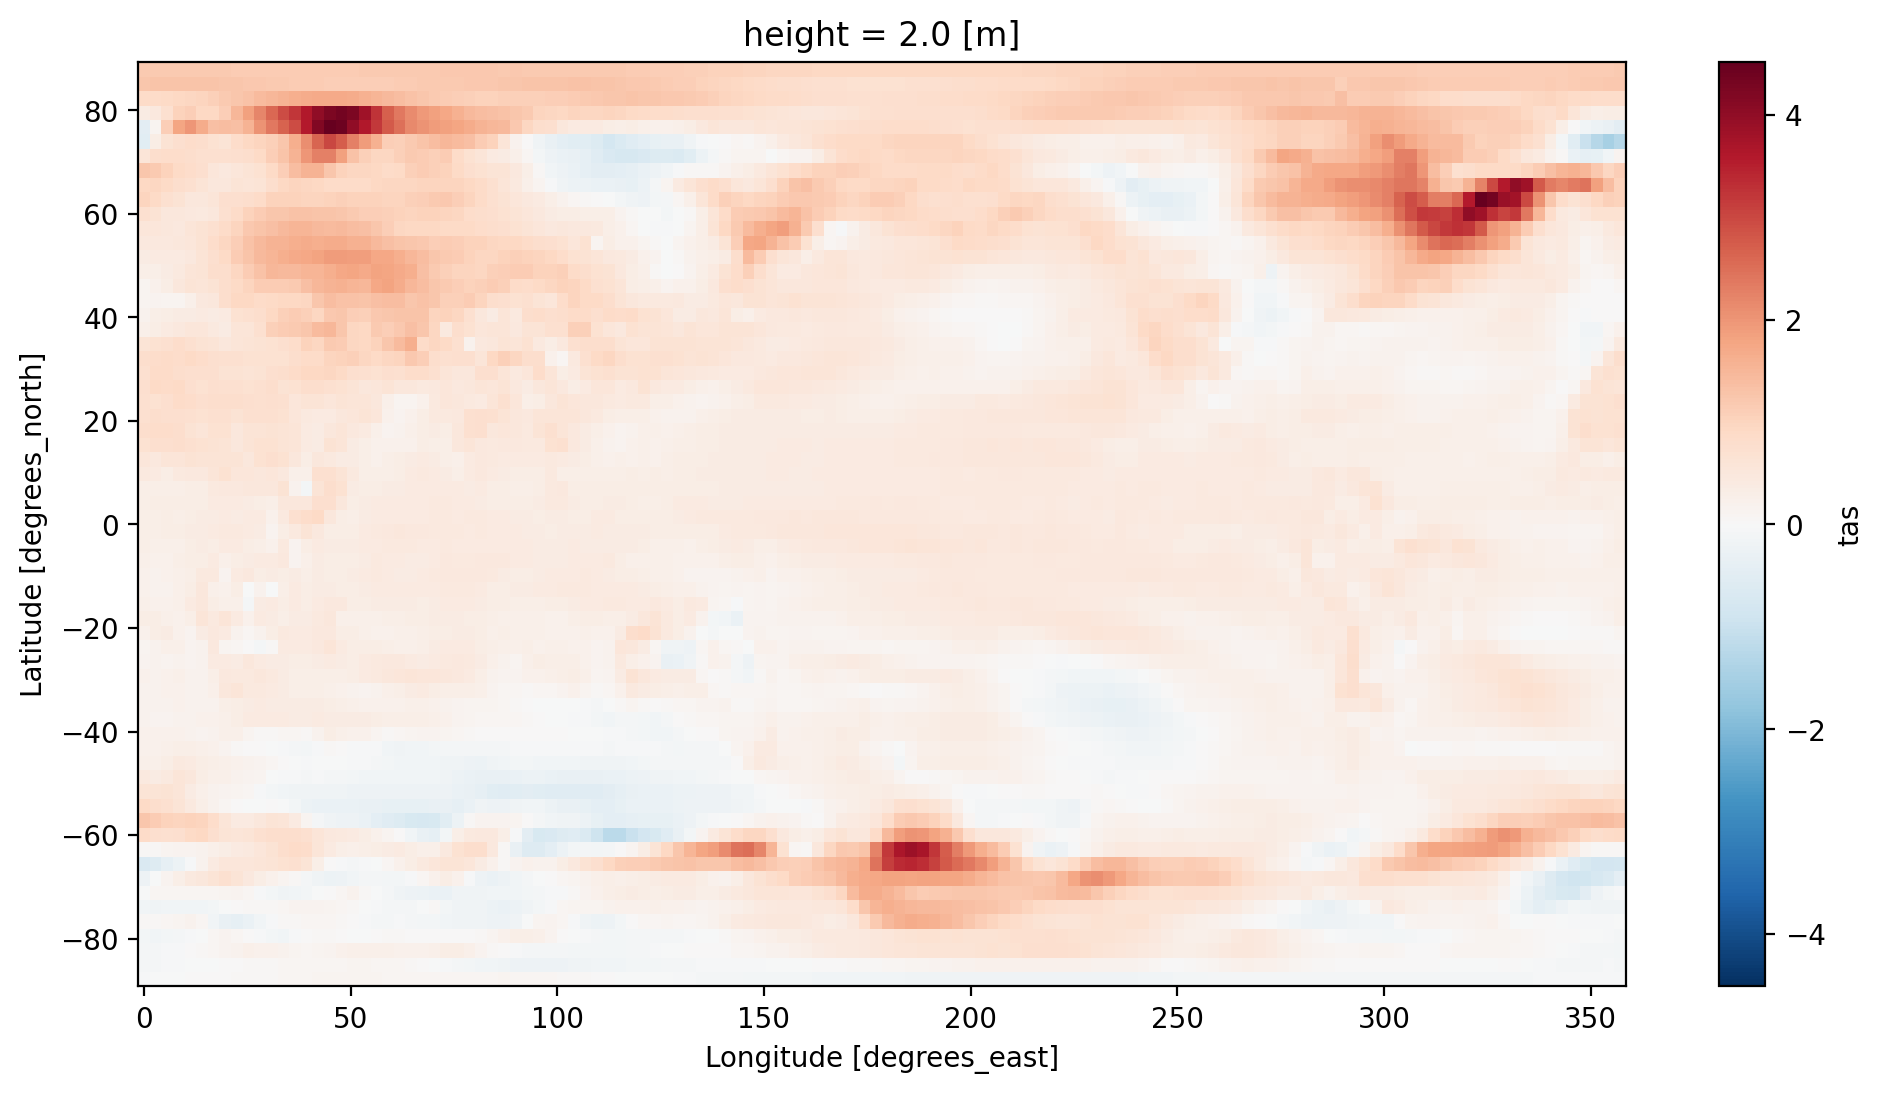

In [9]:
tas_first = tas.tas.sel(time=slice('1815-04-16' , '1825-04-16')).mean(dim='time') #first 10 years
tas_last = tas.tas.sel(time=slice('1860-04-16' , '1870-04-16')).mean(dim='time') #last 10
tas_dif = tas_last-tas_first
tas_dif.plot()

In [42]:
tas.tas

<xarray.DataArray 'tas' (time: 660, lat: 64, lon: 128)>
array([[[221.10197, 220.72284, ..., 221.89816, 221.47255],
        [223.75005, 222.92241, ..., 225.6803 , 224.66644],
        ...,
        [245.29874, 245.54147, ..., 244.85484, 245.06773],
        [245.91246, 245.9187 , ..., 245.80081, 245.84702]],

       [[215.08171, 214.71956, ..., 215.83755, 215.45512],
        [214.76823, 213.88402, ..., 216.90729, 215.76971],
        ...,
        [262.36853, 262.5837 , ..., 262.01364, 262.16956],
        [262.18408, 262.29477, ..., 261.99777, 262.0853 ]],

       ...,

       [[240.21005, 239.90054, ..., 240.74545, 240.45453],
        [241.41383, 240.78726, ..., 242.70924, 242.03313],
        ...,
        [237.65657, 237.79713, ..., 237.56628, 237.5395 ],
        [237.33936, 237.33292, ..., 237.32124, 237.32411]],

       [[224.39459, 224.09795, ..., 224.97414, 224.6784 ],
        [225.07854, 224.46402, ..., 226.69858, 225.81952],
        ...,
        [247.88486, 248.31409, ..., 246.96071, 247.46585],
        [245.42932, 245.44812, ..., 245.30583, 245.34818]]], dtype=float32)
Coordinates:
  * time     (time) object 1815-04-16 00:00:00 ... 1870-03-16 12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        ST+273.16, VolMIP_table_comment: near-surface (usually, 2...
    units:          K
    original_name:  ST
    history:        degctok 2021-01-09T04:38:42Z altered by CMOR: Treated sca...
    cell_methods:   area: time: mean
    cell_measures:  area: areacella

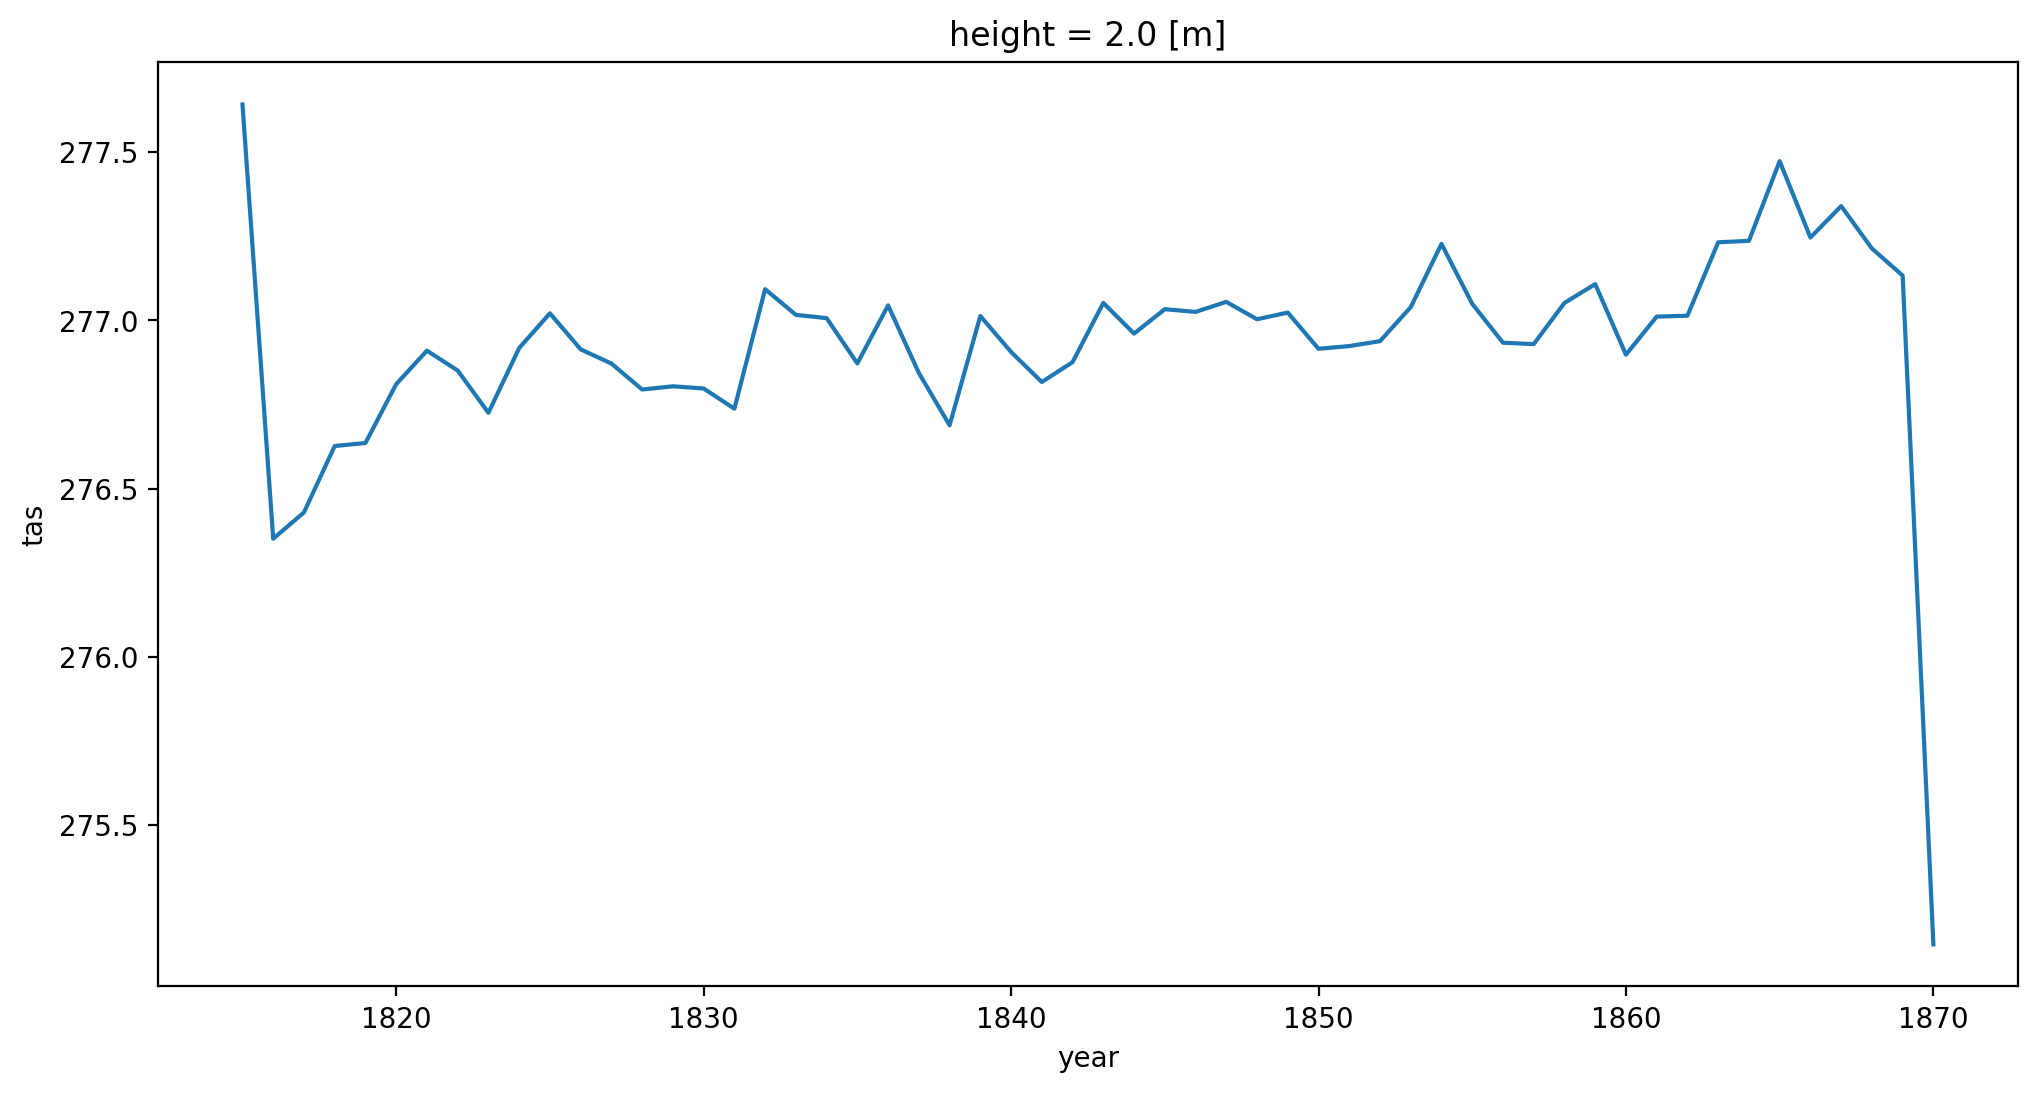

In [55]:
tas_time = tas.tas.mean(['lat', 'lon'])
#tas_time.plot()
#tas_time_annual = ml.util.annual_average(tas_time,tcoord='time')
tas_time.sel(time=slice('1815-04-16' , '1870-04-16')).groupby('time.year').mean(dim='time').plot()

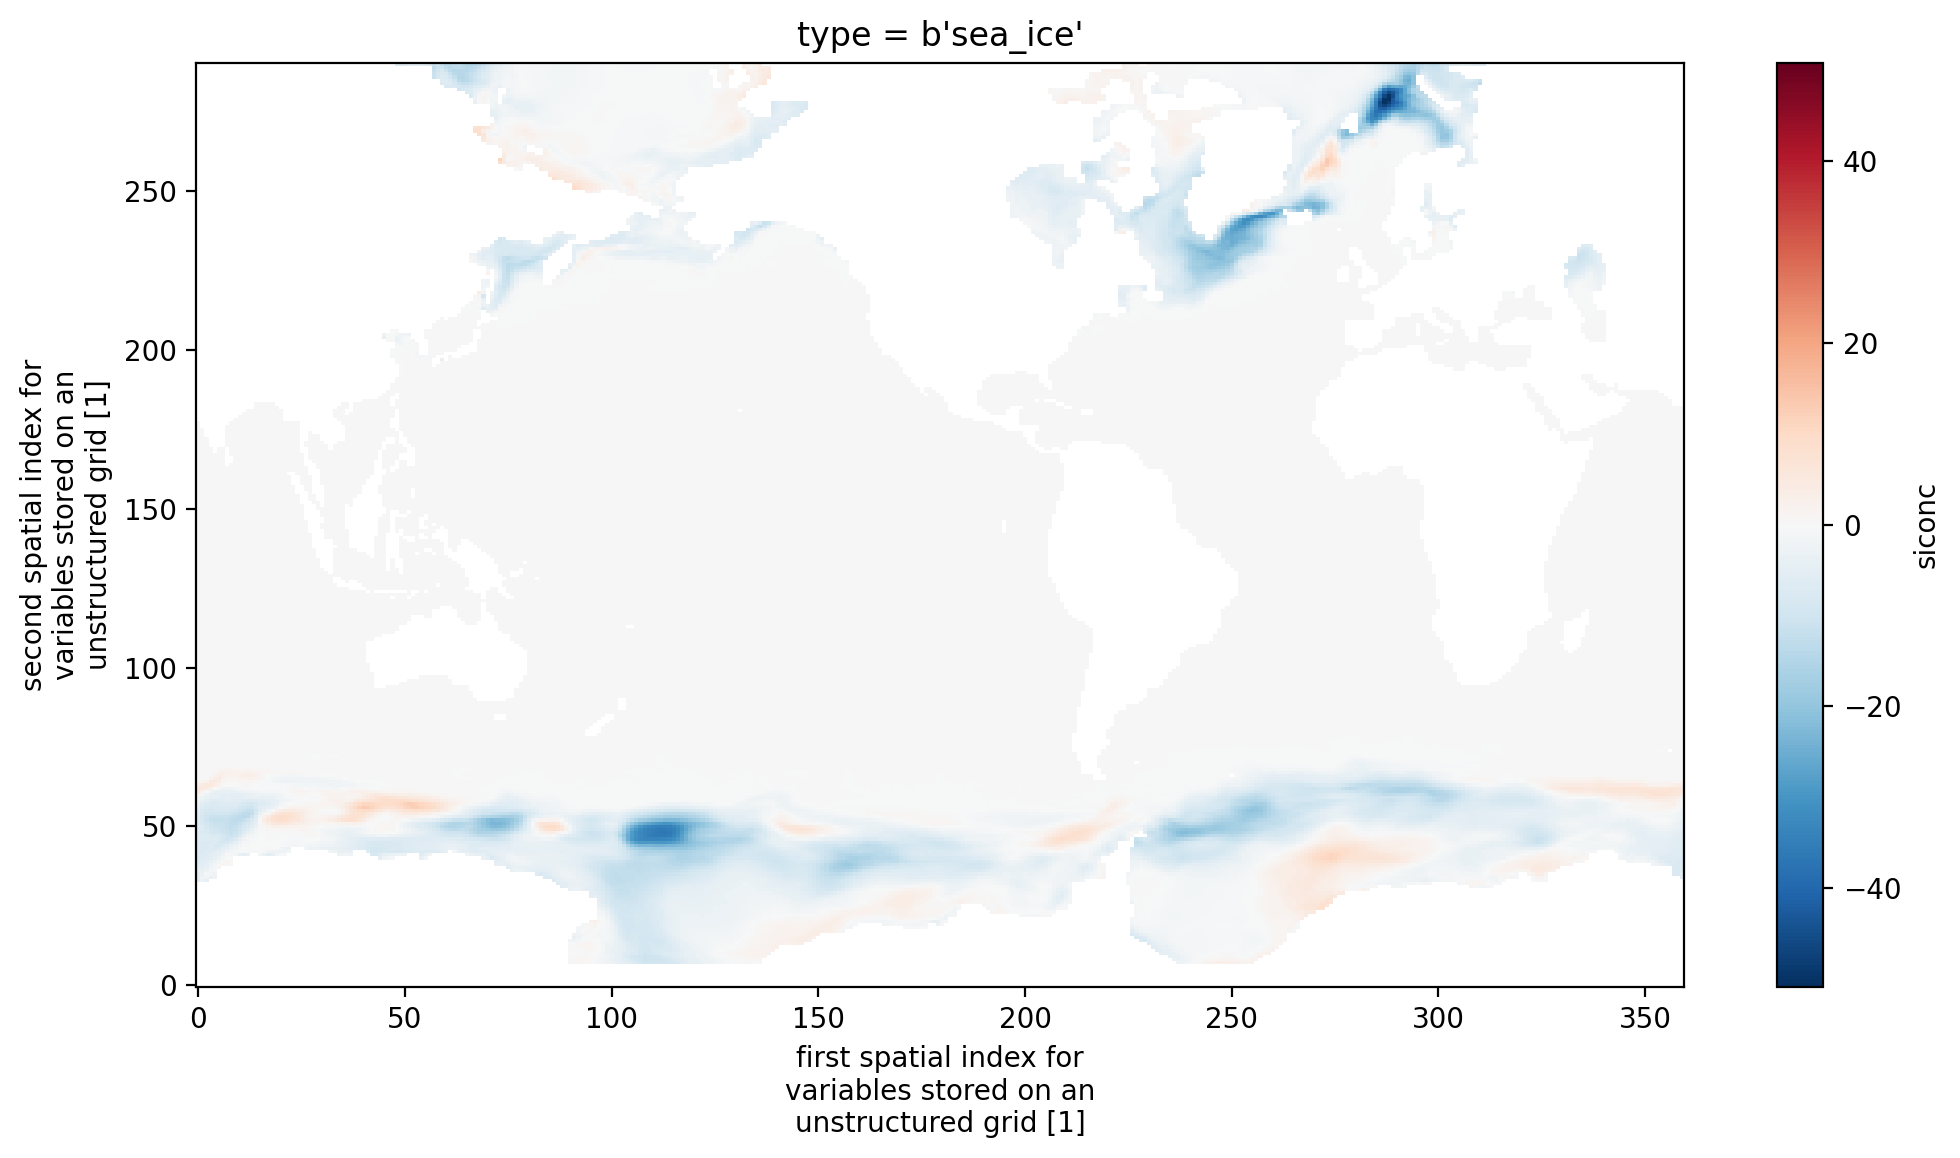

In [10]:
siconc_first = siconc.siconc.sel(time=slice('1815-04-16' , '1825-04-16')).mean(dim='time') #first 10 years
siconc_last = siconc.siconc.sel(time=slice('1860-04-16' , '1870-04-16')).mean(dim='time') #last 10
siconc_dif = siconc_last-siconc_first
siconc_dif.plot()

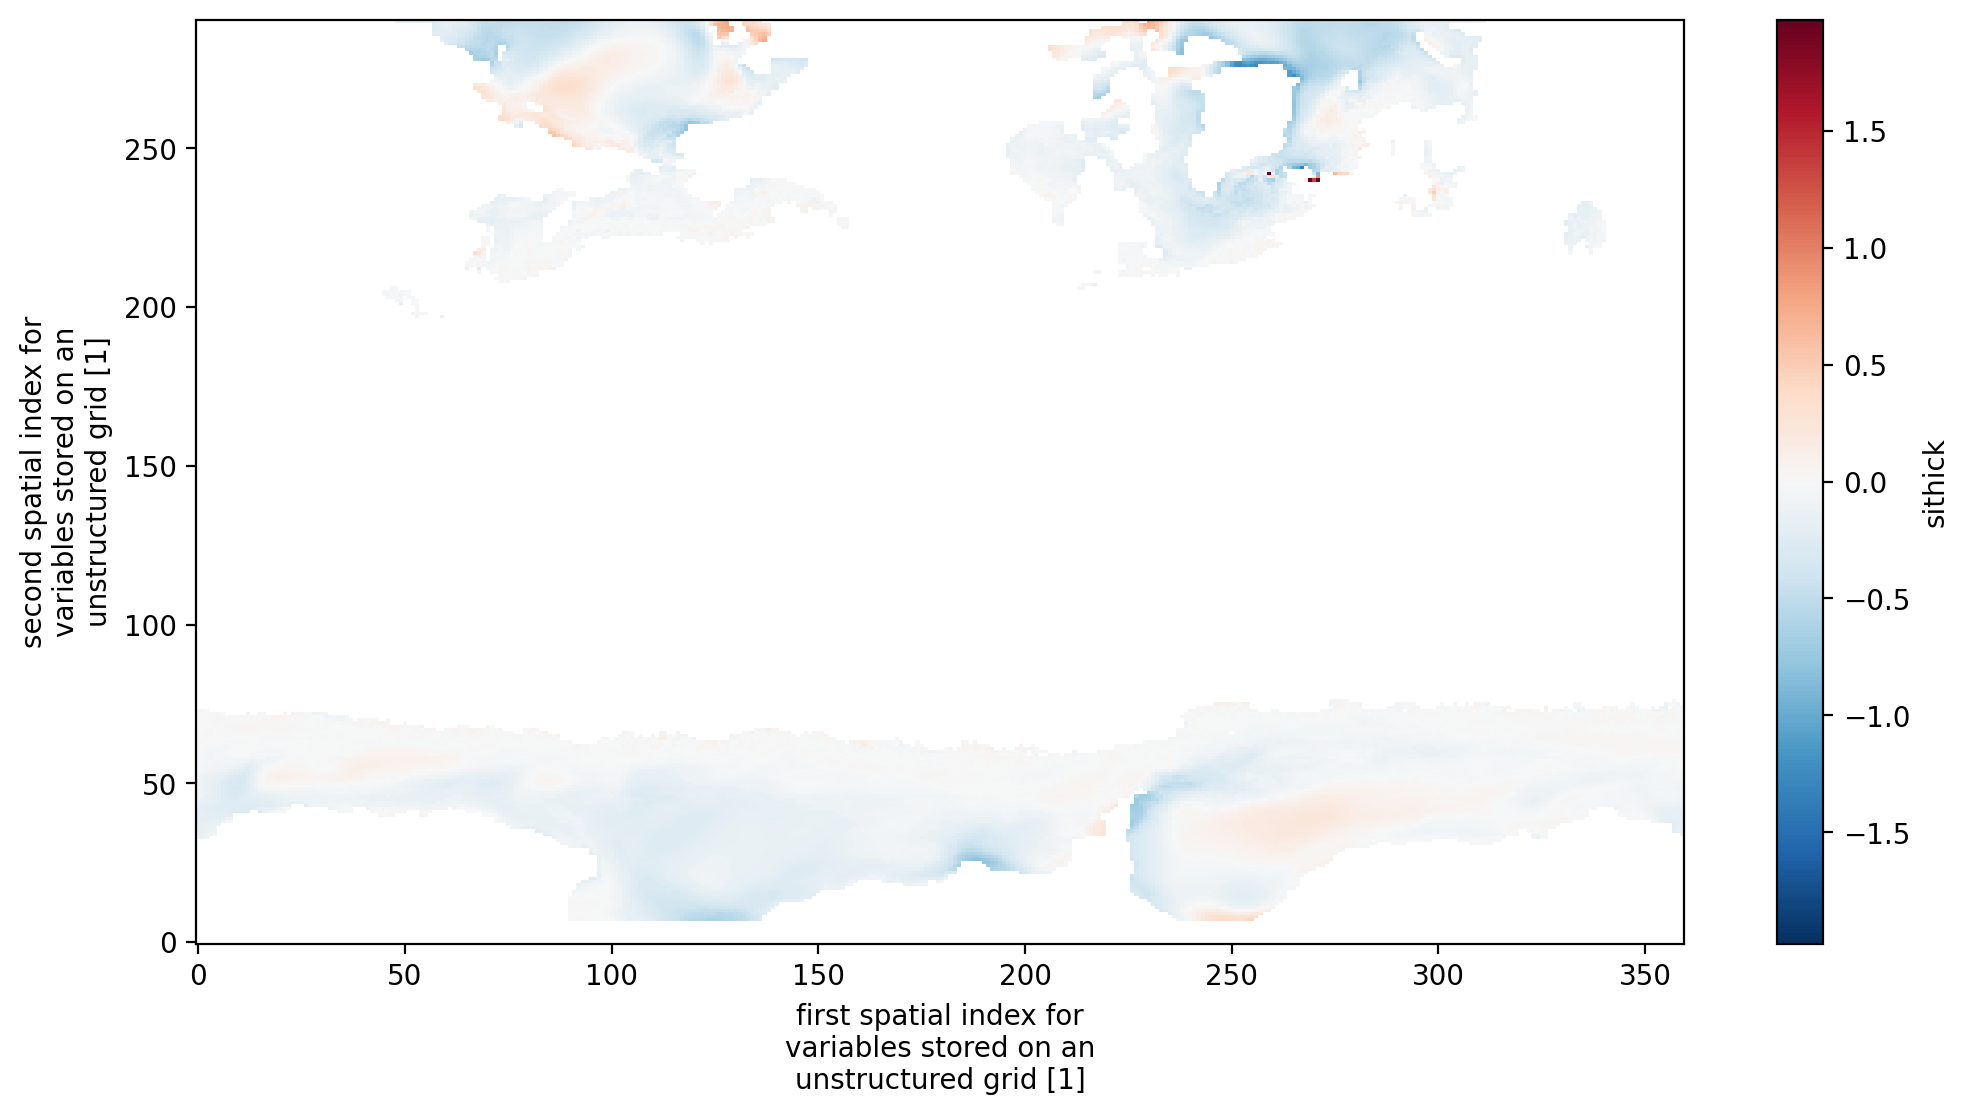

In [11]:
sithick_first = sithick.sithick.sel(time=slice('1815-04-16' , '1825-04-16')).mean(dim='time') #first 10 years
sithick_last = sithick.sithick.sel(time=slice('1860-04-16' , '1870-04-16')).mean(dim='time') #last 10
sithick_dif = sithick_last-sithick_first
sithick_dif.plot()